## Observations and Insights

As a conclusion of the python matplotlib challenge, I can say that the capomulin treatment was the most efficient for the tumor treatments in the mice. The majority of the mice tested were males. They were no outliers. When the doses of the drug is increase, the size of the tumor is reduce.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_study_data=pd.merge(study_results,mouse_metadata,how='outer', on="Mouse ID")

combined_study_data.head(20)

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      b128          0           45.000000                 0    Capomulin   
1      b128          5           45.651331                 0    Capomulin   
2      b128         10           43.270852                 0    Capomulin   
3      b128         15           43.784893                 0    Capomulin   
4      b128         20           42.731552                 0    Capomulin   
5      b128         25           43.262145                 1    Capomulin   
6      b128         30           40.605335                 1    Capomulin   
7      b128         35           37.967644                 1    Capomulin   
8      b128         40           38.379726                 2    Capomulin   
9      b128         45           38.982878                 2    Capomulin   
10     f932          0           45.000000                 0     Ketapril   
11     g107          0           45.000000                 0     Ketapril   
12     g107          5           48.791665                 0     Ketapril   
13     g107         10           53.435987                 0     Ketapril   
14     g107         15           58.135545                 0     Ketapril   
15     g107         20           62.706031                 0     Ketapril   
16     g107         25           64.663626                 0     Ketapril   
17     g107         30           69.160520                 0     Ketapril   
18     g107         35           71.905117                 0     Ketapril   
19     a457          0           45.000000                 0     Ketapril   

       Sex  Age_months  Weight (g)  
0   Female           9          22  
1   Female           9          22  
2   Female           9          22  
3   Female           9          22  
4   Female           9          22  
5   Female           9          22  
6   Female           9          22  
7   Female           9          22  
8   Female           9          22  
9   Female           9          22  
10    Male          15          29  
11  Female           2          29  
12  Female           2          29  
13  Female           2          29  
14  Female           2          29  
15  Female           2          29  
16  Female           2          29  
17  Female           2          29  
18  Female           2          29  
19  Female          11          30

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create inital summary table with Drug Regimes and counts

tumor_data = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())

tumor_data["Mean"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
tumor_data["Median"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
tumor_data["Standard Deviation"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
tumor_data["Variance"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
tumor_data["SEM"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


tumor_data = tumor_data[[ "Mouse ID","Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


tumor_data.head()

Mouse ID       Mean     Median  Standard Deviation   Variance  \
Drug Regimen                                                                  
Capomulin          230  40.675741  41.557809            4.994774  24.947764   
Ceftamin           178  52.591172  51.776157            6.268188  39.290177   
Infubinol          178  52.884795  51.820584            6.567243  43.128684   
Ketapril           188  55.235638  53.698743            8.279709  68.553577   
Naftisol           186  54.331565  52.509285            8.134708  66.173479   

                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466

## Bar plots

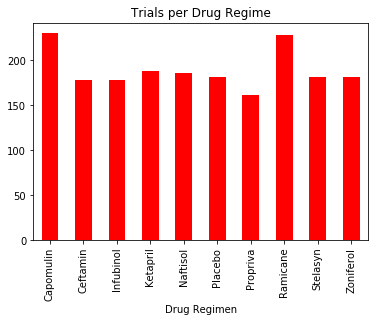

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas



tumor_data = tumor_data[["Mouse ID"]]
tumor_data.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

plt.title("Trials per Drug Regime")
plt.show()
plt.tight_layout()

(0, 240)

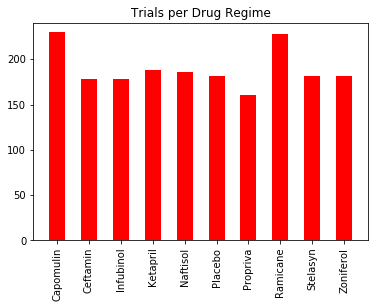

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


x_axis = np.arange(len(tumor_data))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(6,4))
plt.bar(x_axis, tumor_data["Mouse ID"], color = "r", width = .5)
plt.xticks(tick_locations, tumor_data.index.values, rotation="vertical")


plt.title("Trials per Drug Regime")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(tumor_data["Mouse ID"])+10)

## Pie plots

In [5]:
combined_study_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

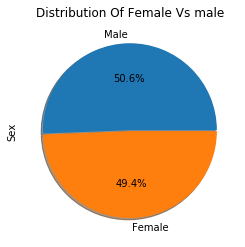

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_study_data.groupby("Sex")["Sex"].count()
explode=(0.01,0)

sexPie=combined_study_data.groupby("Sex")['Sex'].count().sort_index(ascending=False)
sexPie.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True)
plt.title("Distribution Of Female Vs male")
plt.savefig("Pandas Pie.png")


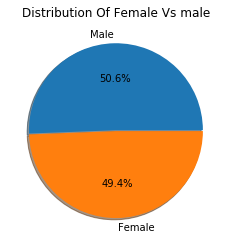

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexPie, explode=explode, autopct="%1.1f%%", shadow=True, labels=sexPie.index)
plt.title("Distribution Of Female Vs male")
plt.savefig("Pyplot Pie.png")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

tumor_number = combined_study_data.loc[(combined_study_data["Drug Regimen"]=="Capomulin") | (combined_study_data["Drug Regimen"] == "Ramicane") | (combined_study_data["Drug Regimen"] == "Infubinol") | (combined_study_data["Drug Regimen"] == "Ceftamin"), :]
tumor_number = tumor_number.sort_values("Timepoint", ascending= False)
tumor_number = tumor_number.drop_duplicates(subset="Mouse ID", keep='first')

quartiles = tumor_number['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

tumor_data = tumor_number.loc[(tumor_number['Tumor Volume (mm3)'] > upper_bound) | (tumor_number['Tumor Volume (mm3)'] < lower_bound), :]

tumor_data.head()

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

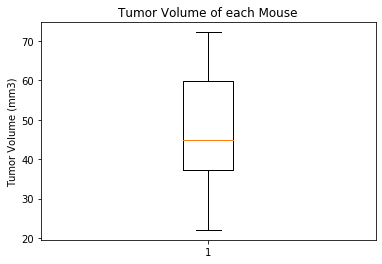

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume= tumor_number['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
plt.show()

## Line and scatter plots

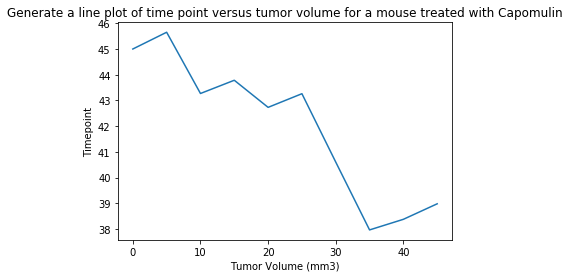

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


capomulin_data = combined_study_data.loc[(combined_study_data["Drug Regimen"]== "Capomulin") & (combined_study_data["Mouse ID"]== "b128"),:]

timepoint = capomulin_data["Timepoint"]
tumor_volume = capomulin_data["Tumor Volume (mm3)"]
plt.title("Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

tumor_value_data= plt.plot(timepoint, tumor_volume)

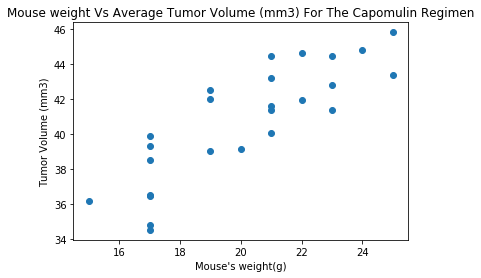

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_result = combined_study_data.loc[(combined_study_data ["Drug Regimen"] == "Capomulin"), :]
mouse_weight = capomulin_result.groupby(combined_study_data["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_result.groupby(combined_study_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Mouse's weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight Vs Average Tumor Volume (mm3) For The Capomulin Regimen")
plt.show()


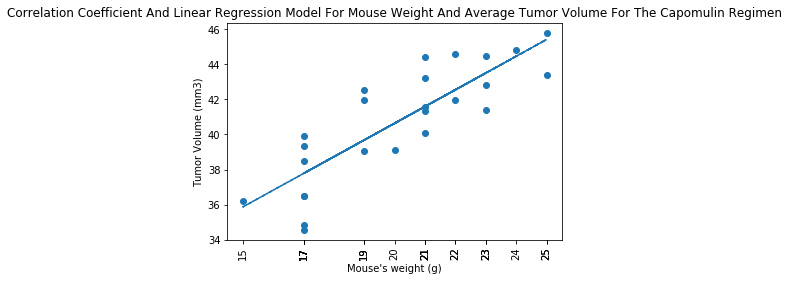

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin_result.groupby(capomulin_result["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_result.groupby(capomulin_result["Mouse ID"])["Tumor Volume (mm3)"].mean()
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, tumor_volume)

line = slope * mouse_weight + intercept

plt.scatter(mouse_weight,tumor_volume)
plt.title("Correlation Coefficient And Linear Regression Model For Mouse Weight And Average Tumor Volume For The Capomulin Regimen")
plt.xlabel("Mouse's weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_weight,line,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()